In [1]:
import models.regress as rgr

prs = rgr.regress_an(DA[1], DA[0], opts=opts1, model = 'analytical_EqMP', 
                     Nx=1000, step = [0.1, 0.1], init_guess = None)

NameError: name 'DA' is not defined

In [3]:
import models.Ansol_dless as andl
# pars = [1000, 100, 0, 0, 0, 0, 1e-3]
# pars1 = [0.425, 100]
# pars = [10, 50, 1000]


opts1 = [35793650.79*1.75e-6/2, 0.4, 0.4]
opts = [1.75e-6/2/5.5, 2*1e-9]

# DA = andl.pulse(pars=pars, opts=opts, model='analytical_DAMP', T=4, dt=0.004, Nx=1000,
#                  inversion = 'ILap')
# Eq = andl.pulse(pars=pars1, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000,
#                  inversion = 'ILap')

In [74]:
import numpy as np
import pandas as pd
from IPython.display import clear_output

ka = 1
KH_lim = [5, -5]
KH_sim = np.linspace(KH_lim[0], KH_lim[1], 51)
alpha_lim = [-5, 5]
alpha_sim = np.linspace(alpha_lim[0], alpha_lim[1], 51) 

T = 10
dt = 0.01

dFldpar = np.zeros((len(KH_sim), len(alpha_sim)))
dFldKHs = np.zeros((len(KH_sim), len(alpha_sim)))
dFldalphas = np.zeros((len(KH_sim), len(alpha_sim)))
Flows = np.zeros((len(KH_sim), len(alpha_sim), int(round(T/float(dt)))+1))
for n, i in enumerate(KH_sim):
    for m, j in enumerate(alpha_sim):
        k_ent = (10**(-3))
#         k_ext = k_ent/(10**i)
        pars = [10**ka, (10**ka)/(10**(1)), k_ent, k_ent/10**(i), 0, 0, (10**j)]
#         pars = [10**ka, 10**ka/10**i, 10**j]
#         pars = [10**i, 10**j]
        Flows[n, m] = andl.pulse(pars=pars, opts=opts1, model='analytical_7P', T=T, dt=dt, Nx=1000, inversion = 'ILap')[1]
        clear_output(wait=True)
        print('Progress: ' + str(round((n*len(alpha_sim)+m+1)/(len(KH_sim)*len(alpha_sim))*100,2)) + ' %')
        
dlogKH = KH_sim[1] - KH_sim[0]       
for n, i in enumerate(KH_sim):
    for m, j in enumerate(alpha_sim):        
        if n != 0 and n != len(KH_sim)-1:
            if m != 0 and m != len(alpha_sim)-1:
                
#                 pars01 = np.exp([KH_sim[n-1], alpha_sim[m]])
#                 Fl01 = andl.pulse(pars=pars01, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
#                 pars02 = np.exp([KH_sim[n+1], alpha_sim[m]])
#                 Fl02 = andl.pulse(pars=pars02, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
                dFldKH = np.sum(abs(Flows[n+1, m]-Flows[n-1, m]))/abs((KH_sim[n+1] - KH_sim[n-1]))
                
#                 pars03 = np.exp([KH_sim[n], alpha_sim[m+1]])
#                 Fl03 = andl.pulse(pars=pars03, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
#                 pars04 = np.exp([KH_sim[n], alpha_sim[m+1]])
#                 Fl04 = andl.pulse(pars=pars04, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
                dFldalpha = np.sum(abs(Flows[n, m+1]-Flows[n, m-1]))/abs((alpha_sim[m+1] - alpha_sim[m-1]))
                
                dFldpar[n, m] = (dFldKH + dFldalpha)/2
                dFldKHs[n, m] = dFldKH
                dFldalphas[n, m] = dFldalpha
#             else:
#                 pars11 = np.exp([KH_sim[n-1], alpha_sim[m]])
#                 Fl11 = andl.pulse(pars=pars11, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
#                 pars12 = np.exp([KH_sim[n+1], alpha_sim[m]])
#                 Fl12 = andl.pulse(pars=pars12, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
#                 dFldKH = np.sum(abs(Fl12-Fl11))/(KH_sim[n+1] - KH_sim[n-1])
                
#                 dFldpar[n, m] = dFldKH
#         else:
#             if m != 0 and m != len(alpha_sim)-1:
#                 pars21 = np.exp([KH_sim[n], alpha_sim[m-1]])
#                 Fl21 = andl.pulse(pars=pars21, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]

#                 pars22 = np.exp([KH_sim[n], alpha_sim[m+1]])
#                 Fl22 = andl.pulse(pars=pars22, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]

#                 dFldalpha = np.sum(abs(Fl22-Fl21))/(alpha_sim[m+1] - alpha_sim[m-1])

#             dFldpar[n, m] = dFldalpha
df = pd.DataFrame(dFldpar[1:-1, 1:-1], index=KH_sim[1:-1], columns = alpha_sim[1:-1])

Progress: 100.0 %


In [54]:
# df.to_csv('saved/1ZDAMP_ka1_sens_kent4_KP_alpha_m10p10.csv')

In [22]:
T = 10
dt = 0.01
import models.regress as rgr
# pars = [10**0, (10**0)/(10**(-1)), 10**(0), 10**(-5), (10**-3)]
pars = [10**-1.1, 10**(0)]
DA = andl.pulse(pars=pars, opts=opts1, model='analytical_EqMP', T=T, dt=dt, Nx=1000, inversion = 'ILap')
# prs = rgr.regress_an(DA[1], DA[0], opts=opts, model = 'analytical_DAMP', 
#                      Nx=1000, step = [0.01, 0.01, 0.01], init_guess = None)
pars = [10**-.9, 10**(0)]
response1 = andl.pulse(pars=pars, opts=opts1, model='analytical_EqMP', T=T, dt=dt, Nx=1000, inversion = 'ILap')

NameError: name 'DA' is not defined

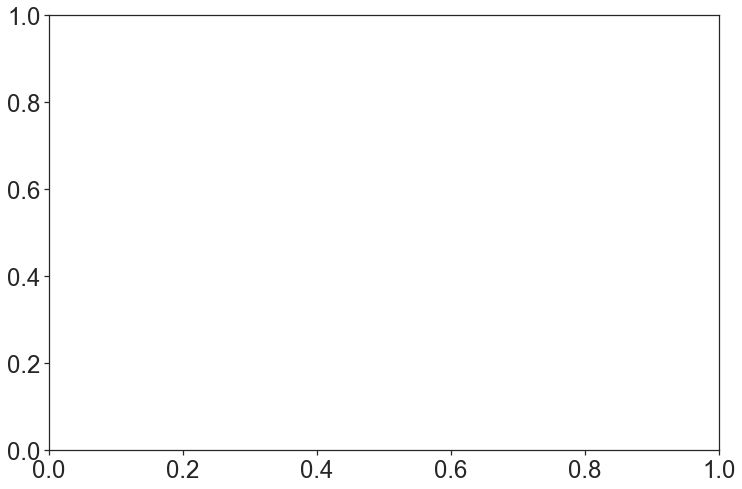

In [38]:
%matplotlib notebook
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.set_style(style='white')
plt.tick_params(labelsize=24, left = True, bottom = True, direction = 'out', length = 5)
plt.plot(DA[0],DA[1], 'r-', linewidth=4, label = '                   ')
plt.plot(response1[0],response1[1], 'b-', linewidth=4, label = '                 ')
# plt.plot(dfex['time'],dfex['Flow']/1e-9, 'b-', markersize=4, label = 'Analytical')
# plt.plot(datmat['time'],datmat['Flow'], 'g-', markersize=4, label = 'Transfer Matrix')
# plt.title("ka = "+str(round(pars[0],4)) + ", kd = " + str(round(pars[1],4)) +
#          ", Dp = "+str(round(pars[2],4)) + ", k_ent = "+str(round(pars[3],4))
#           + ", k_ext = "+str(round(pars[4],4)))
plt.legend()
# plt.xlim(0,4)
plt.xlabel('Dimensionless time')
plt.ylabel('Dimensionless flow')
plt.show()

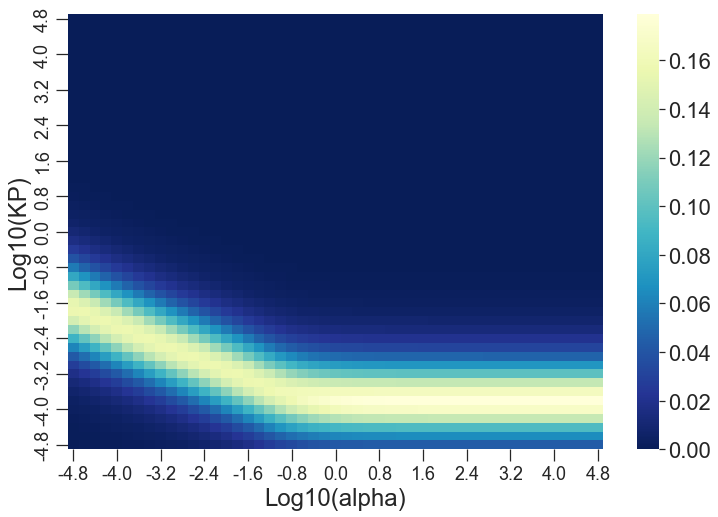

In [75]:
%matplotlib notebook
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.DataFrame(dFldKHs[1:-1, 1:-1], index=np.around(KH_sim[1:-1],2), columns = np.around(alpha_sim[1:-1],2))
# df = df.fillna(0)
# df = pd.DataFrame(dFldpar, index=KH_sim, columns = alpha_sim)
# Default heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.0)
plt.tick_params(labelsize=18, left = True, bottom = True, direction = 'out', length = 12)
sns.heatmap(df, cmap="YlGnBu_r", xticklabels = 4, yticklabels = 4)
plt.xlabel("Log10(alpha)")
plt.ylabel("Log10(KP)") 
plt.show()

In [3]:
import numpy as np
import pandas as pd
from IPython.display import clear_output

ka = 2
KH_lim = [5, -5]
KH_sim = np.linspace(KH_lim[0], KH_lim[1], 101)
alpha_lim = [-5, 5]
alpha_sim = np.linspace(alpha_lim[0], alpha_lim[1], 101) 

T = 10
dt = 0.01

dispers = np.zeros((len(KH_sim), len(alpha_sim)))
mean_rt = np.zeros((len(KH_sim), len(alpha_sim)))
peaktimes = np.zeros((len(KH_sim), len(alpha_sim)))
for n, i in enumerate(KH_sim):
    for m, j in enumerate(alpha_sim):
        pars = [10**ka, 10**ka/(10**i), 10**j]
        sens_coeff = andl.sens_pars(pars=pars, opts=opts, model='analytical_DAMP', T=T, dt=dt, Nx=1000)
        mean_rt[n, m] = sens_coeff[0]
        peaktimes[n, m] = sens_coeff[1]
        dispers[n, m] = sens_coeff[2]
        clear_output(wait=True)
        print('Progress: ' + str(round((n*len(alpha_sim)+m+1)/(len(KH_sim)*len(alpha_sim))*100,2)) + ' %')
        


Progress: 100.0 %


In [4]:
mrt = mean_rt.copy()
pt = peaktimes.copy()
disp = dispers.copy()
mrt[mrt == 0] = 1e-4
pt[pt == 0] = 1e-4
disp[disp == 0] = 1e-4

In [10]:
df1 = pd.DataFrame(np.log10(mrt), index=np.round(KH_sim,2), columns = np.round(alpha_sim,2))
# df1=df1.drop(df1.index[-1])
df2 = pd.DataFrame(pt, index=np.round(KH_sim,2), columns = np.round(alpha_sim,2))
df3 = pd.DataFrame(np.log10(disp), index=np.round(KH_sim,2), columns = np.round(alpha_sim,2))

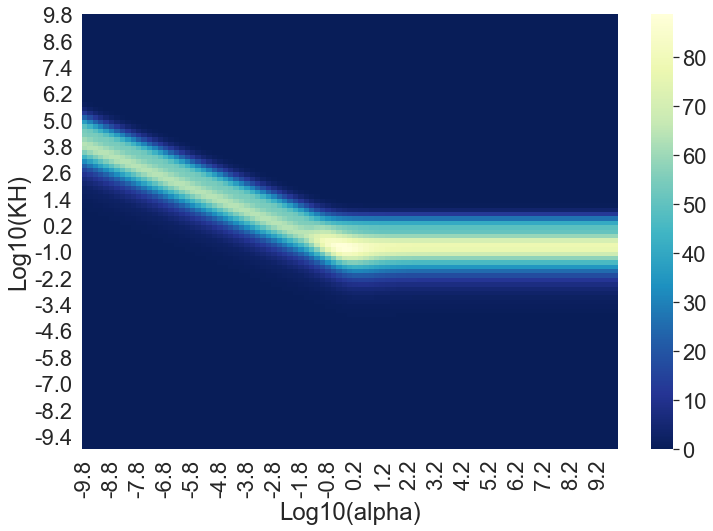

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt 
df1 = pd.read_csv('saved/1ZEqMP_sens_m10p10.csv', skiprows = None)
df1 = df1.set_index('Unnamed: 0')
# df = pd.DataFrame(dFldpar[1:-1, 1:-1], index=np.around(KH_sim[1:-1],2), columns = np.around(alpha_sim[1:-1],2))
# df = df.fillna(0)
# df = pd.DataFrame(dFldpar, index=KH_sim, columns = alpha_sim)
# Default heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df1, cmap="YlGnBu_r")
plt.xlabel("Log10(alpha)") 
plt.ylabel("Log10(KH)") 
plt.show()

In [44]:
import numpy as np
import pandas as pd
from IPython.display import clear_output

ka = -2
KH_lim = [-5, 5]
KH_sim = np.linspace(KH_lim[0], KH_lim[1], 101)
alpha_lim = [-5, 5]
alpha_sim = np.linspace(alpha_lim[0], alpha_lim[1], 101) 

T = 4
dt = 0.004

dispers = np.zeros((len(KH_sim), len(alpha_sim)))
mean_rt = np.zeros((len(KH_sim), len(alpha_sim)))
peaktimes = np.zeros((len(KH_sim), len(alpha_sim)))
for n, i in enumerate(KH_sim):
    for m, j in enumerate(alpha_sim):
        pars = [10**ka, 10**ka/(10**i), 10**j]
        sens_coeff = andl.sens_pars(pars=pars, opts=opts, model='analytical_DAMP', T=T, dt=dt, Nx=1000)
        mean_rt[n, m] = sens_coeff[0]
        peaktimes[n, m] = sens_coeff[1]
        dispers[n, m] = sens_coeff[2]
        clear_output(wait=True)
        print('Progress: ' + str(round((n*len(alpha_sim)+m+1)/(len(KH_sim)*len(alpha_sim))*100,2)) + ' %')
        


Progress: 100.0 %


In [ ]:
import models.regress as rgr
import models.Ansol_dless as andl

import numpy as np
import pandas as pd
from IPython.display import clear_output

opts1 = [35793650.79*1.75e-6/2, 0.4, 0.4]
opts = [1.75e-6/2/5.5, 2*1e-9]

ka_lim = [-5, 5]
ka_sim = np.linspace(ka_lim[0], ka_lim[1], 51)
kd_lim = [-10, 10]
kd_sim = np.linspace(kd_lim[0], kd_lim[1], 101) 

T = 4
dt = 0.004

Error = np.zeros((len(ka_sim), len(kd_sim)))
# Flows = np.zeros((len(ka_sim), len(kd_sim), int(round(T/float(dt)))+1))
for n, i in enumerate(ka_sim):
    for m, j in enumerate(kd_sim):
        pars = [10**i, 10**j, 10**0]
        T = 4
        dt = 0.004
        flow = [100]
        r=0
        while flow[-1] > 0.001:
            DA = andl.pulse(pars=pars, opts=opts, model='analytical_DAMP', T=T, dt=dt, Nx=1000, inversion = 'ILap')
            flow, time = DA[1], DA[0]
            T = 2*T
            dt = 2*dt
            r += 1
            if r >20:
                break
        prs = rgr.regress_an(flow, time, opts=opts1, model = 'analytical_EqMP', 
                     Nx=1000, step = [0.01, 0.01], init_guess = None)
        
        Eq = andl.pulse(pars=np.power(10, prs), opts=opts1, model='analytical_EqMP', T=T, dt=dt, Nx=1000,
                 inversion = 'ILap')
        err = np.sum(abs(Eq[1]-DA[1]))
        Error[n, m] = err
        clear_output(wait=True)
        print(pars, prs)
        print('Progress: ' + str(round((n*len(kd_sim)+m+1)/(len(ka_sim)*len(kd_sim))*100,2)) + ' %')

[0.15848931924611143, 6.309573444801943, 1] [ 2.57699467 -9.89257203]
Progress: 42.24 %


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

KH_lim = [10, -10]
KH_sim = np.linspace(KH_lim[0], KH_lim[1], 101)
alpha_lim = [-10, 10]
alpha_sim = np.linspace(alpha_lim[0], alpha_lim[1], 101) 

df = pd.read_csv('saved/1ZEqMP_sens_m10p10.csv', skiprows = None)
df = df.set_index('Unnamed: 0')
df1 = pd.read_csv('saved/1ZDAMP_ka1_sens_kentm3_KP_alpha_m10p10.csv', skiprows = None)
df1 = df1.set_index('Unnamed: 0')
df1_array = df.to_numpy()
# real_value = np.log10(df1_array)
df1 = pd.DataFrame(df1_array, index = df1.index, columns = df1.columns)
# df1.replace(-4.0, 0)
df2 = df1.replace(-4.0, 0)
# df2 = df2.drop(df2.index[55:])

dTdpar = np.zeros((df2.shape[0], df2.shape[1]))
for n in range(df2.shape[0]):
    for m in range(df2.shape[1]):        
#         print(n,m)
        if n != 0 and n != df2.shape[0]-1:
            if m != 0 and m != df2.shape[1]-1:
                
                dTdKH = abs(df2.iloc[n+1, m]-df2.iloc[n-1, m])/abs(df2.index[n+1] - df2.index[n-1])

                dTdalpha = abs(df2.iloc[n, m+1]-df2.iloc[n, m-1])/abs(float(df2.columns[m+1]) - float(df2.columns[m-1]))
                
                dTdpar[n, m] = (dTdKH + dTdalpha)/2

df_fin = pd.DataFrame(dTdpar[1:-1, 1:-1], index=df2.index[1:-1], columns = df2.columns[1:-1])

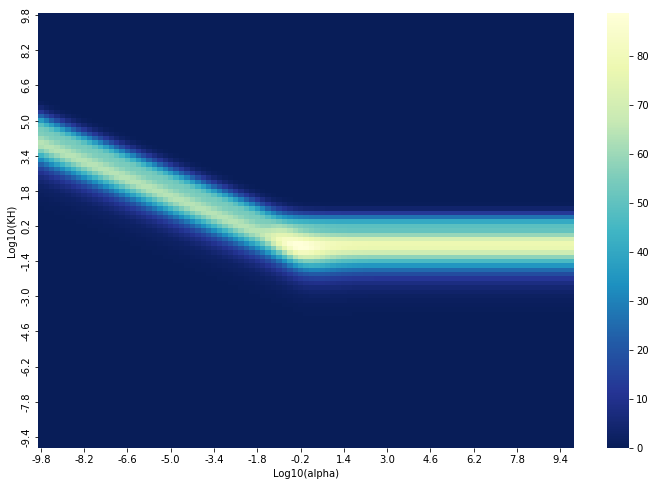

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1, cmap="YlGnBu_r", xticklabels = 8, yticklabels = 8)
plt.xlabel("Log10(alpha)")
plt.ylabel("Log10(KH)")
plt.show()

In [154]:
D1=10**(-2.63)
D2=10**(-3.54)
opts={}
# pars=[ka, kd]
opts['length'] = np.array([0.0, 0.0022, 0.0])     # List of zone lengths, m 
opts['porosity'] = 0.4                       # List of zone porosities
opts['microporosity'] = 0.4
opts['Surface per weight'] = 33 * 1000                  # Surface-to-weight ratio for the microporous particles, m2/kg
opts['AS concentration'] = 0.29  # Concentration of active cites mol/kg
opts['AS concentration within particle'] = 0.1
opts['cross_section'] = 1.26e-5
opts['T'] = 273
opts['Tref'] = 298.15
opts['Np'] = 1e-9
opts['Mref'] = 19.9
opts['M'] = 58.1
opts['micropore_Rp'] = 1.75e-6 / 2                      # Characteristic length of micropore diffusion, m
opts['dr'] = opts['micropore_Rp'] / 100
opts['Unit-layer thickness'] = 2e-9
opts['Adsorption TD constants'] = [ 6.47714203, 20.,         11. ,        49.00000073]
# [ 6.47714203, 20.,         11. ,        49.00000073]

opts['Sample mass'] = 15.8e-6                            # catalyst weight, kg
opts['Dref zones'] = [D1, D2, D1]

In [159]:
import models.Ansol_dless as andl
temp = np.linspace(50, 300, 6)
temp
# -7.13964954  34.05177534
# pars = [np.exp(-(-50*1e3-(temp+273)*(-100))/8.314/(temp+273)), 1e-10*np.exp(-25/8.314/(temp+273))]
# pars
# prs_dim = andl.pars_to_dim_less(pars, opts, model= 'analytical_EqMP')

prs_dim = []
for t in temp:
    opts['T'] = t
    par = [np.exp(-(-20*1e3-(t+273)*(-70))/8.314/(t+273)), 1e-12*np.exp(-7*1e3/8.314/(t+273))]
    pr_dim = andl.pars_to_dim_less(par, opts, model= 'analytical_EqMP')
    prs_dim.append(pr_dim)

coord = np.round(np.log10(np.array(prs_dim)).T, 1)
df2 = df1.copy()

print(coord)
for i, c in enumerate(coord[0]):
    if (int(c*10) % 2) == 0:
        a = c
    else: 
        a = round(c+0.1,1)
    if (int(coord[1][i]*10) % 2) == 0:
        b = coord[1][i]
    else:
        b = round(coord[1][i]+0.1,1)
    print(a,b)
    df2.loc[a,str(b)] = 120

[[-0.4 -0.9 -1.2 -1.4 -1.7 -1.8]
 [-2.2 -2.2 -2.1 -2.1 -2.1 -2.1]]
-0.4 -2.2
-0.8 -2.2
-1.2 -2.0
-1.4 -2.0
-1.6 -2.0
-1.8 -2.0


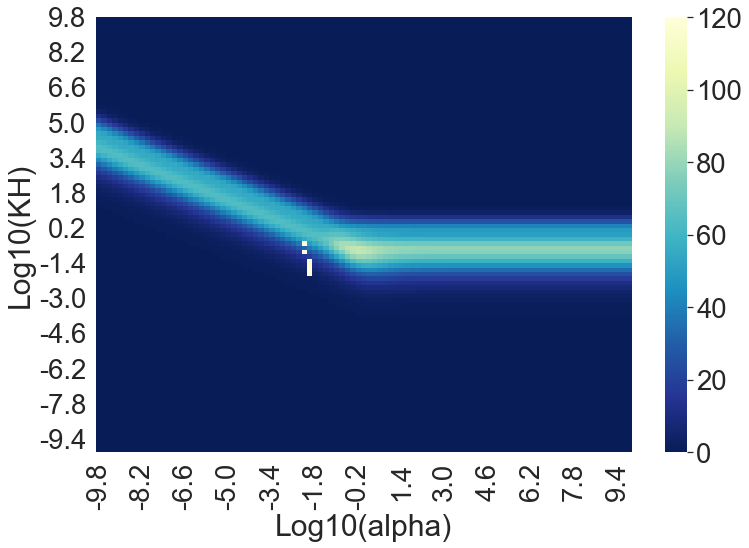

In [160]:
sns.set(font_scale=2.5)
plt.figure(figsize=(12, 8))
sns.heatmap(df2, cmap="YlGnBu_r", xticklabels = 8, yticklabels = 8)
# sns.heatmap(mat, cmap="YlGnBu_r", xticklabels = 8, yticklabels = 8)
plt.xlabel("Log10(alpha)")
plt.ylabel("Log10(KH)")
plt.grid()
plt.show()

In [255]:
T = 10
dt = 0.01
import models.regress as rgr
# pars = [10**0, (10**0)/(10**(-1)), 10**(0), 10**(-5), (10**-3)]
pars = [10**coord[0][5], 10**coord[0][5]]
DA = andl.pulse(pars=pars, opts=opts1, model='analytical_EqMP', T=T, dt=dt, Nx=1000, inversion = 'ILap')
# prs = rgr.regress_an(DA[1], DA[0], opts=opts, model = 'analytical_DAMP', 
#                      Nx=1000, step = [0.01, 0.01, 0.01], init_guess = None)
pars = [10**coord[0][0], 10**coord[0][0]]
response1 = andl.pulse(pars=pars, opts=opts1, model='analytical_EqMP', T=T, dt=dt, Nx=1000, inversion = 'ILap')

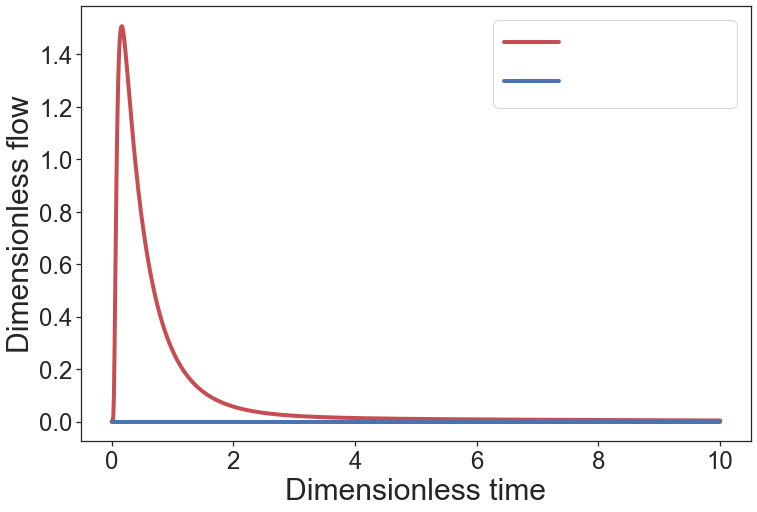

In [256]:
%matplotlib notebook
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.set_style(style='white')
plt.tick_params(labelsize=24, left = True, bottom = True, direction = 'out', length = 5)
plt.plot(DA[0],DA[1], 'r-', linewidth=4, label = '                   ')
plt.plot(response1[0],response1[1], 'b-', linewidth=4, label = '                 ')
# plt.plot(dfex['time'],dfex['Flow']/1e-9, 'b-', markersize=4, label = 'Analytical')
# plt.plot(datmat['time'],datmat['Flow'], 'g-', markersize=4, label = 'Transfer Matrix')
# plt.title("ka = "+str(round(pars[0],4)) + ", kd = " + str(round(pars[1],4)) +
#          ", Dp = "+str(round(pars[2],4)) + ", k_ent = "+str(round(pars[3],4))
#           + ", k_ext = "+str(round(pars[4],4)))
plt.legend()
# plt.xlim(0,4)
plt.xlabel('Dimensionless time')
plt.ylabel('Dimensionless flow')
plt.show()

In [73]:
1.75e-6/2/5.5/(2*1e-9)

79.54545454545455

In [172]:
1e-3/0.4/0.048**2*12

13.020833333333332

In [43]:
(0.048**2/1e-3)*(1e-15/(1.75e-6/2)**2)

0.00300930612244898

In [3]:
import numpy as np
D1=10**(-2.67444123)
D2=10**(-3.91186072)
opts={}
# pars=[ka, kd]
opts['length'] = np.array([0.0217, 0.0015, 0.0252])     # List of zone lengths, m 
opts['porosity'] = 0.4                       # List of zone porosities
opts['microporosity'] = 0.4
opts['Surface per weight'] = 33 * 1000                  # Surface-to-weight ratio for the microporous particles, m2/kg
opts['AS concentration'] = 0.29  # Concentration of active cites mol/kg
opts['AS concentration within particle'] = 0.1
opts['cross_section'] = 1.26e-5
opts['T'] = 273+300
opts['Tref'] = 298.15
opts['Np'] = 1e-9
opts['Mref'] = 39.9
opts['M'] = 39.9
opts['micropore_Rp'] = 1.75e-6 / 2                      # Characteristic length of micropore diffusion, m
opts['dr'] = opts['micropore_Rp'] / 100
opts['Unit-layer thickness'] = 1e-9

opts['Sample mass'] = 10.2e-6                            # catalyst weight, kg
opts['Dref zones'] = [D1, D2, D1]

In [45]:
import models.Ansol_dless as andl
Temps = [250, 225, 200, 175, 150,100]
for temp in Temps:
    TD_pars = [ 9.5,  70.02,  13.61,  96.89,  4.68,  49.68,  4.18,  33.82, 0,0,0,0, -13.0,  0.01]
    pars = [np.power(10.0, TD_pars[m])*np.exp(-TD_pars[m+1]*1e3/8.314/(temp+273)) for m in range(len(TD_pars)) if m%2 ==0]
#     print(pars)
#     print(pars)
    prs = andl.pars_to_dim_less(pars, opts, model = 'analytical_7P')
    print(np.log10(prs[0]/prs[1]))
    print(np.log10(prs[2]/prs[3]))
    print(np.log10(prs[:4]), np.log10(prs[-1]))

1.166215320501501
-1.084075165202139
[ 2.82321761  1.65700229 -2.55772731 -1.47365214] -2.762831558434972
1.3009411712214725
-1.1635970108448168
[ 2.47213819  1.17119702 -2.80682222 -1.64322521] -2.7628816983124262
1.4499086552099405
-1.2515249712488765
[ 2.08394678  0.63403813 -3.08224851 -1.83072354] -2.762937138388343
1.6155019744649788
-1.3492663200908896
[ 1.65243044  0.03692846 -3.38841435 -2.03914803] -2.7629987659727324
1.800668972118956
-1.4585610198598553
[ 1.16990743 -0.63076154 -3.73077001 -2.27220899] -2.7630676781415655
2.2454669075022387
-1.7211027115300763
[ 0.01081731 -2.2346496  -4.55315785 -2.83205514] -2.763233215147663


In [41]:
p = 10
while p < 0:
    p += 1 
    print(p)

In [35]:
-0.63720081/-2.71816735

0.23442295044858072

In [92]:
surf_bar_prs = [ 9.9, 73.35,  13.5,  96.1,   8.7,  86.32,  8.6,  62.54,  -11.56,  0.01]
surf_bar_prs1 = [8.85, 70.,12.16, 89.98, 5.26,   92.13,   8.75, 47.3, -12.5,   0.]
surf_bar_prs2 = [ 9.5,  70.02,  13.61,  96.89,  4.68,  49.68,  4.18,  33.82, -13.0,  0.01]
Temps = [250, 225, 200, 175, 150,100]
for temp in Temps:
    TD_pars = [4.0, 12.0, 12.0, 97.0]
    pars = [np.power(10.0, TD_pars[m])*np.exp(-TD_pars[m+1]*1e3/8.314/(temp+273)) for m in range(len(TD_pars)) if m%2 ==0]
#     print(pars[2]/pars[3])
    print(pars)

[633.0767575165536, 205.00871277005143]
[551.1737379982346, 66.89836557437302]
[472.890321226783, 19.393079198233995]
[398.84791309227364, 4.896200596477944]
[329.69527369764774, 1.0505365449776878]
[208.67398709062564, 0.026043671312991592]
